In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips['tip'].loc[4]

3.61

In [8]:
tips[['total_bill','tip']].loc[4].mean()

14.1

In [28]:
ttt = tips[['total_bill','tip']]


In [44]:
ttt.loc[4].idxmin()
ttt.nlargest

'tip'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,True,False
99997,False,False,False,False,False,False,False,False,True,False,True,False
99998,False,False,False,False,False,False,False,False,False,False,True,False


<AxesSubplot:>

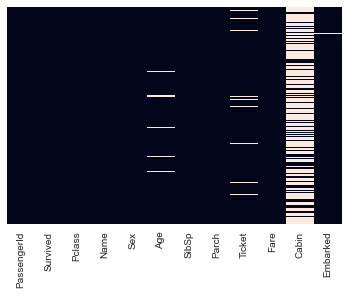

In [51]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [55]:
train.isnull().query('Age==True')['Age'].size

0

In [20]:
train.isnull().query('Age==True')['Age'].size/100000*100

3.292

In [18]:
train.isnull().query('Ticket==True')['Ticket'].size

4623

In [22]:
train.isnull().query('Ticket==True')['Ticket'].size/100000*100

4.623

In [19]:
train.isnull().query('Cabin==True')['Cabin'].size

67866

In [24]:
train.isnull().query('Cabin==True')['Cabin'].size/100000*100

67.866

In [60]:
train.isnull().query('Embarked==True')['Embarked'].size

250

<AxesSubplot:xlabel='Survived', ylabel='count'>

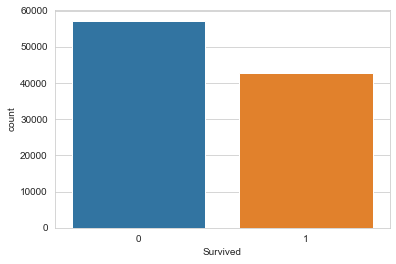

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

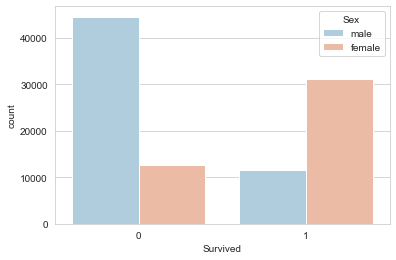

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

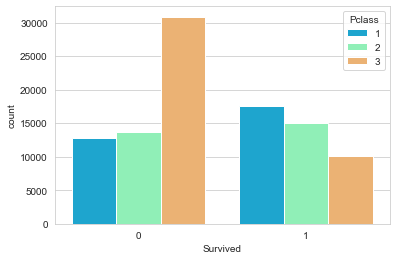

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data=train,palette='rainbow')

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

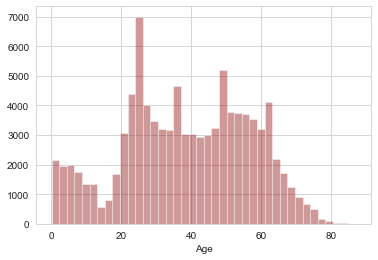

In [29]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

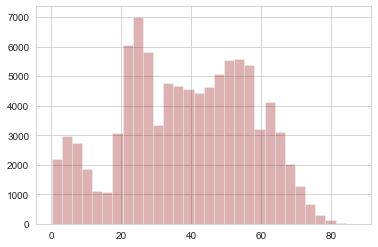

In [30]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

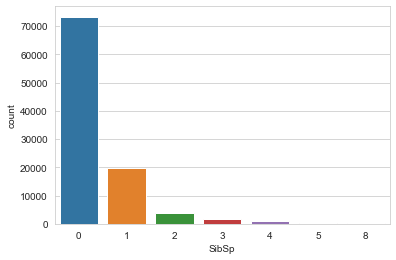

In [31]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

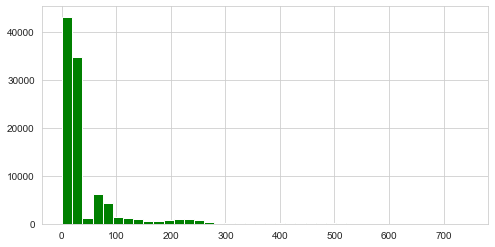

In [34]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

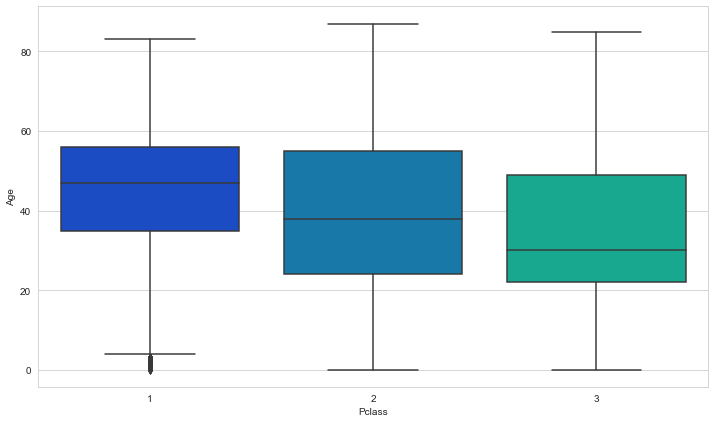

In [35]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [49]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 45
        elif Pclass == 2:
            return 39
        else:
            return 33
    return Age

In [39]:
train[train['Pclass']==1]['Age'].mean()

44.774463938950014

In [40]:
train[train['Pclass']==2]['Age'].mean()

38.631237243518086

In [41]:
train[train['Pclass']==3]['Age'].mean()

33.40736220472441

In [53]:
train['Age'] = train[['Age','Pclass']].apply(input_age,axis=1)

<AxesSubplot:>

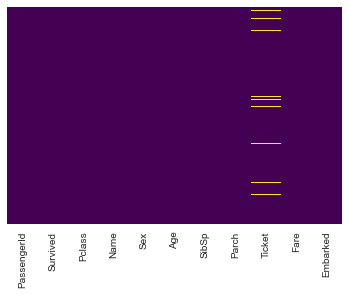

In [68]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [56]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

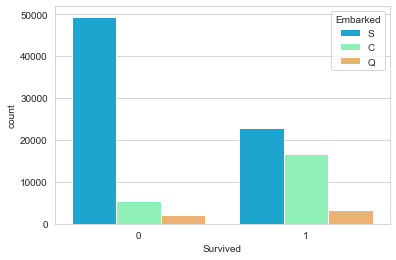

In [58]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked', data=train,palette='rainbow')

In [64]:
def input_Embarked(col):
    Em = col[0]
    if pd.isnull(Em):
        return 'S'
    return Em

In [67]:
train['Embarked'] = train[['Embarked','Pclass']].apply(input_Embarked,axis=1)

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          100000 non-null  float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Embarked     100000 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 6.9+ MB


In [70]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
